In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [6]:
#Experiment to see if the function 

# ts = 3
# ta = np.array([0, 2, 3])
# tc = np.array([.5, .6, .7])
# tb = np.array([[0 ,0, 0], [4, 0, 0], [5, 6, 0]])

# y0 = dx*derivf(x + ta[0]*dx, y)
# y1 = dx*derivf(x + ta[1]*dx, y + tb[1, 0]*y0)
# y2 = dx*derivf(x + ta[2]*dx, y + tb[2, 0]*y0 + tb[2, 1]*y1)

In [7]:
# def general_rk_step2(f, x, y, dx):
    
#     a = np.array([0, 1/5, 3/10, 3/5, 1, 7/8])
#     c = np.array([37/378, 0, 250/621, 125/594, 0, 512/1771])
#     b = np.array([[0, 0, 0, 0, 0, 0], 
#                   [1/5, 0, 0, 0, 0, 0], 
#                   [3/40, 9/40, 0, 0, 0, 0], 
#                   [3/10, -9/10, 6/5, 0 ,0, 0], 
#                   [-11/54, 5/2, -70/27, 35/27, 0, 0], 
#                   [1631/55296, 175/512, 575/13824, 44275/110592, 253/4096, 0]])
    
#     s = np.size(a)
    
#     yi = []
#     total_weighted_sum = 0
#     y_total = 0
    
#     for n in range(s):
        
#         y_total = 0
#         for i, dyi in enumerate(yi):
#             y_total += b[n, i]*dyi
   
#         new_y = f(x + a[n]*dx, y + y_total)

#         yi.append(new_y)
#         total_weighted_sum += c[n] * new_y
        
#     x += dx
#     y += dx*total_weighted_sum
# #     y += dx*np.array([y[1], total_weighted_sum])
    
# #     print(x, y)
        

#     return x, y

    

In [8]:
def general_rk_step(f, x, y, dx):
    
    a = np.array([0, 1/5, 3/10, 3/5, 1, 7/8])
    c = np.array([37/378, 0, 250/621, 125/594, 0, 512/1771])
    b = np.array([[0, 0, 0, 0, 0, 0], 
                  [1/5, 0, 0, 0, 0, 0], 
                  [3/40, 9/40, 0, 0, 0, 0], 
                  [3/10, -9/10, 6/5, 0 ,0, 0], 
                  [-11/54, 5/2, -70/27, 35/27, 0, 0], 
                  [1631/55296, 175/512, 575/13824, 44275/110592, 253/4096, 0]])
    
    s = np.size(a)
    
    dy0 = dx * f(x, y)
    dy1 = dx * f(x + a[1]*dx, y + b[1,0]*dy0)
    dy2 = dx * f(x + a[2]*dx, y + b[2,0]*dy0 + b[2,1]*dy1)
    dy3 = dx * f(x + a[3]*dx, y + b[3,0]*dy0 + b[3,1]*dy1 + b[3,2]*dy2)
    dy4 = dx * f(x + a[4]*dx, y + b[4,0]*dy0 + b[4,1]*dy1 + b[4,2]*dy2 + b[4,3]*dy3)
    dy5 = dx * f(x + a[5]*dx, y + b[5,0]*dy0 + b[5,1]*dy1 + b[5,2]*dy2 + b[5,3]*dy3 + b[5,4]*dy4)
    
    y += c[0]*dy0 + c[1]*dy1 + c[2]*dy2 + c[3]*dy3 + c[4]*dy4 + c[5]*dy5
    x += dx


    return x, y

def general_rk_step_reverse(f, x, y, dx):
    
    a = np.array([0, 1/5, 3/10, 3/5, 1, 7/8])
    c = np.array([37/378, 0, 250/621, 125/594, 0, 512/1771])
    b = np.array([[0, 0, 0, 0, 0, 0], 
                  [1/5, 0, 0, 0, 0, 0], 
                  [3/40, 9/40, 0, 0, 0, 0], 
                  [3/10, -9/10, 6/5, 0 ,0, 0], 
                  [-11/54, 5/2, -70/27, 35/27, 0, 0], 
                  [1631/55296, 175/512, 575/13824, 44275/110592, 253/4096, 0]])
    
    s = np.size(a)
    
    dy0 = dx * f(x, y)
    dy1 = dx * f(x - a[1]*dx, y - b[1,0]*dy0)
    dy2 = dx * f(x - a[2]*dx, y - b[2,0]*dy0 - b[2,1]*dy1)
    dy3 = dx * f(x - a[3]*dx, y - b[3,0]*dy0 - b[3,1]*dy1 - b[3,2]*dy2)
    dy4 = dx * f(x - a[4]*dx, y - b[4,0]*dy0 - b[4,1]*dy1 - b[4,2]*dy2 - b[4,3]*dy3)
    dy5 = dx * f(x - a[5]*dx, y - b[5,0]*dy0 - b[5,1]*dy1 - b[5,2]*dy2 - b[5,3]*dy3 - b[5,4]*dy4)
    
    y -= c[0]*dy0 + c[1]*dy1 + c[2]*dy2 + c[3]*dy3 + c[4]*dy4 + c[5]*dy5
    x -= dx


    return x, y

    

Question 1 Duffing

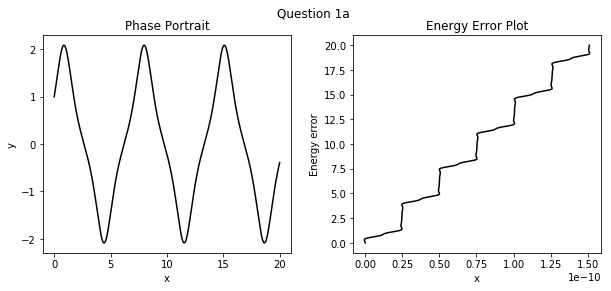

In [10]:
delta = 0.0
alpha = -2.0
beta = 1.0

def deriv2(x, y):
    return -delta*y[1] - alpha*y[0] - beta*y[0]**3

def phi(x, y):
    return 0.5*alpha*y[0]**2 + 0.25*beta*y[0]**4

def energy(x, y):
    return 0.5*y[1]**2 + phi(x, y)

def f(x, y):
    return np.array([y[1], deriv2(x, y)])

def euler_step(func, x, y, dx):
    y += dx*func(x, y)
    x += dx
    return x, y

def reverse_euler_step(func, x, y, dx):
    y -= dx*func(x, y)
    x -= dx
    return x, y


xplots = []
yplots = []
vplots = []
eplots = []

xmax = 20
dx = 0.01
x = 0.0
y0 = 1
v0 = 1.5
y = np.array([y0, v0])
e_initial = energy(x, y)

xplot = [x]
yplot = [y[0]]
vplot = [y[1]]
eplot = [0]

while x < xmax:
    yp = y[0]
    vp = y[1]
    
    if x == 0: yp = y0 + 1
        
    x, y = general_rk_step(f, x, y, dx)
    #x, y = euler_step(f, x, y, dx)

    xplot.append(x)
    yplot.append(y[0])
    vplot.append(y[1])
    eplot.append(energy(x, y) - e_initial)
    
    #print(x, y)
#     if yp <= y0 and y[0] > y0:
#         break
        
        
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Question 1a') 
plt.subplots_adjust(wspace=.25)

# vint = vp + (y[1]-vp)*(y[0]-y0)/(y[0]-yp)
# print('vint =', vint, 'err =', abs((vint-v0)/v0))


ax[0].plot(xplot, yplot, 'k')
ax[0].set(xlabel = 'x', ylabel = 'y', title = 'Phase Portrait')

ax[1].plot(eplot, xplot, 'k')
ax[1].set(xlabel = 'x', ylabel = 'Energy error', title = 'Energy Error Plot')

plt.savefig('Question1a_graph.jpg')

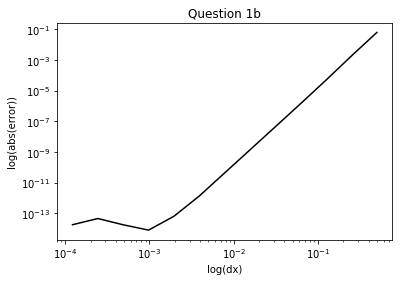

In [6]:
xmax = 20
dx = 0.01
x = 0.0
y0 = 1
v0 = 1.5
y = np.array([y0, v0])
e_initial = energy(x, y)

eplot = []
dxplot = []

for n in range(1, 14):
    x = 0.0
    y0 = 1
    v0 = 1.5
    y = np.array([y0, v0])
    e_initial = energy(x, y)
    dx = 2**(-n)
   
    while x < xmax:
        yp = y[0]
        vp = y[1]

        if x == 0: yp = y0 + 1

        x, y = general_rk_step(f, x, y, dx)
        #x, y = euler_step(f, x, y, dx)

        
    eplot.append(abs(energy(x, y) - e_initial))
    dxplot.append(dx)
    
plt.loglog(dxplot, eplot, 'k')
plt.xlabel('log(dx)')
plt.ylabel('log(abs(error))')
plt.title('Question 1b')

plt.savefig('Question1b.jpg')


In [11]:
xmax = 20
dx = 0.01
x = 0.0
y0 = 1
v0 = 1.5
y = np.array([y0, v0])

while x < xmax:
    xp = x
    yp = y[0]
    vp = y[1]

    if x == 0: yp = y0 + 1
        
    x, y = general_rk_step(f, x, y, dx)
    #x, y = euler_step(f, x, y, dx)

while x > 0:
    
    xp = x
    yp = y[0]
    vp = y[1]

    x, y = general_rk_step_reverse(f, x, y, dx)
    #x, y = reverse_euler_step(f, x, y, dx)

print(xp, yp, vp)


    

1.3530843112619095e-16 0.9999999977106117 1.4999999986752677


QUESTION 2

alpha = -1 beta = 1 gamma = 0.0 delta = 0.0 omega = 0.0
y0 = 1 v0 = 1.5
integrator = Fancy RK dx = 0.01


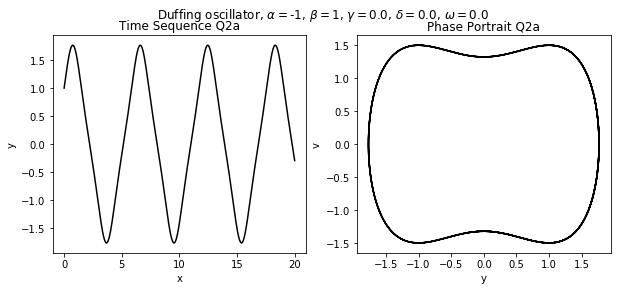

In [8]:
def deriv2(x, y):
    return -delta*y[1] - alpha*y[0] - beta*y[0]**3 - gamma*np.cos(omega*x)

def phi(x, y):
    return 0.5*alpha*y[0]**2 + 0.25*beta*y[0]**4

def f(x, y):
    return np.array([y[1], deriv2(x, y)])

y0 = 1
v0 = 1.5

alpha = -1
beta  = 1
gamma = 0.0
delta = 0.0
omega = 0.0
    
x = 0.0
xmax = 20

y = np.array([y0, v0])
    
xplot = [x]
yplot = [y[0]]
vplot = [y[1]]

while x < xmax:

    xp = x
    yp = y[0]
    vp = y[1]

    x, y = general_rk_step(f, x, y, dx)

    xplot.append(x)
    yplot.append(y[0])
    vplot.append(y[1])
    
print('alpha =', alpha, 'beta =', beta,
          'gamma =', gamma, 'delta =', delta, 'omega =', omega)
print('y0 =', y0, 'v0 =', v0)
print('integrator = Fancy RK', 'dx =', dx)
    
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Duffing oscillator'
                +', $\\alpha=$'+str(alpha)
                +', $\\beta=$'+str(beta)
                +', $\\gamma=$'+str(gamma)
                +', $\\delta=$'+str(delta)
                +', $\\omega=$'+str(omega))
# plt.subplots_adjust(wspace=.01)

ax[0].plot(xplot, yplot, 'k')
ax[0].set(xlabel = 'x', ylabel = 'y', title = 'Time Sequence Q2a')

ax[1].plot(yplot, vplot, 'k')
ax[1].set(xlabel = 'y', ylabel = 'v', title = 'Phase Portrait Q2a')

plt.savefig('Q2a1.jpg')


alpha = -1 beta = 1 gamma = 0.0 delta = 0.3 omega = 0.0
y0 = 1 v0 = 1.5
integrator = Fancy RK dx = 0.01


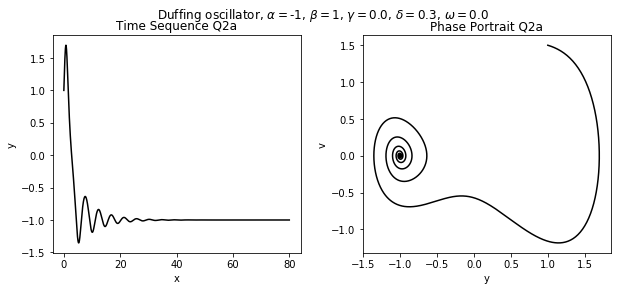

In [9]:
y0 = 1
v0 = 1.5

alpha = -1
beta  = 1
gamma = 0.0
delta = .3
omega = 0.0
    
x = 0.0
xmax = 80

y = np.array([y0, v0])
    
xplot = [x]
yplot = [y[0]]
vplot = [y[1]]

while x < xmax:

    xp = x
    yp = y[0]
    vp = y[1]

    x, y = general_rk_step(f, x, y, dx)

    xplot.append(x)
    yplot.append(y[0])
    vplot.append(y[1])
    
print('alpha =', alpha, 'beta =', beta,
          'gamma =', gamma, 'delta =', delta, 'omega =', omega)
print('y0 =', y0, 'v0 =', v0)
print('integrator = Fancy RK', 'dx =', dx)
    
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Duffing oscillator'
                +', $\\alpha=$'+str(alpha)
                +', $\\beta=$'+str(beta)
                +', $\\gamma=$'+str(gamma)
                +', $\\delta=$'+str(delta)
                +', $\\omega=$'+str(omega))
plt.subplots_adjust(wspace=.25)

ax[0].plot(xplot, yplot, 'k')
ax[0].set(xlabel = 'x', ylabel = 'y', title = 'Time Sequence Q2a')

ax[1].plot(yplot, vplot, 'k')
ax[1].set(xlabel = 'y', ylabel = 'v', title = 'Phase Portrait Q2a')

plt.savefig('Q2a2.jpg')



alpha = -1 beta = 1 gamma = 0.2 delta = 0.3 omega = 1.2
y0 = 1 v0 = 1.5
integrator = Fancy RK dx = 0.01


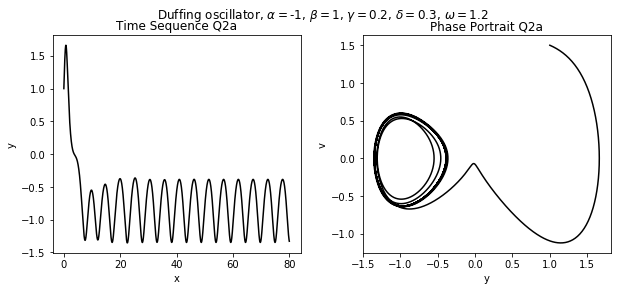

In [10]:
y0 = 1
v0 = 1.5

alpha = -1
beta  = 1
gamma = .2
delta = .3
omega = 1.2
    
x = 0.0
xmax = 80

y = np.array([y0, v0])
    
xplot = [x]
yplot = [y[0]]
vplot = [y[1]]

while x < xmax:

    xp = x
    yp = y[0]
    vp = y[1]

    x, y = general_rk_step(f, x, y, dx)

    xplot.append(x)
    yplot.append(y[0])
    vplot.append(y[1])
    
print('alpha =', alpha, 'beta =', beta,
          'gamma =', gamma, 'delta =', delta, 'omega =', omega)
print('y0 =', y0, 'v0 =', v0)
print('integrator = Fancy RK', 'dx =', dx)
    
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Duffing oscillator'
                +', $\\alpha=$'+str(alpha)
                +', $\\beta=$'+str(beta)
                +', $\\gamma=$'+str(gamma)
                +', $\\delta=$'+str(delta)
                +', $\\omega=$'+str(omega))
plt.subplots_adjust(wspace=.25)

ax[0].plot(xplot, yplot, 'k')
ax[0].set(xlabel = 'x', ylabel = 'y', title = 'Time Sequence Q2a')

ax[1].plot(yplot, vplot, 'k')
ax[1].set(xlabel = 'y', ylabel = 'v', title = 'Phase Portrait Q2a')

plt.savefig('Q3a.jpg')



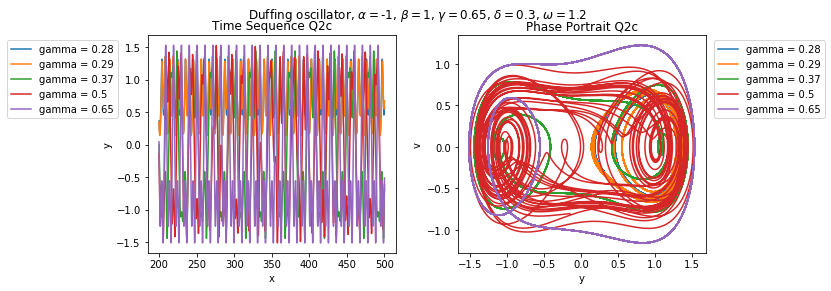

In [17]:
y0 = 1
v0 = 1.5

alpha = -1
beta  = 1
gamma_list = [.28, .29, .37, .5, .65]
delta = .3
omega = 1.2

fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Duffing oscillator'
                +', $\\alpha=$'+str(alpha)
                +', $\\beta=$'+str(beta)
                +', $\\gamma=$'+str(gamma)
                +', $\\delta=$'+str(delta)
                +', $\\omega=$'+str(omega))
plt.subplots_adjust(wspace=.25)

for gamma in gamma_list:
    
    x = 0.0
    xmax = 500

    y = np.array([y0, v0])

    xplot = []
    yplot = []
    vplot = []

    while x < xmax:

        xp = x
        yp = y[0]
        vp = y[1]

        x, y = general_rk_step(f, x, y, dx)

        if x >= 200:
            xplot.append(x)
            yplot.append(y[0])
            vplot.append(y[1])

    # print('alpha =', alpha, 'beta =', beta,
    #           'gamma =', gamma, 'delta =', delta, 'omega =', omega)
    # print('y0 =', y0, 'v0 =', v0)
    # print('integrator = Fancy RK', 'dx =', dx)
    

    
    ax[0].plot(xplot, yplot, label = 'gamma = {}'.format(gamma))
    ax[0].set(xlabel = 'x', ylabel = 'y', title = 'Time Sequence Q2c')
    ax[0].legend(bbox_to_anchor=(-0.6, .5, 0.5, 0.5))

    ax[1].plot(yplot, vplot, label = 'gamma = {}'.format(gamma))
    ax[1].set(xlabel = 'y', ylabel = 'v', title = 'Phase Portrait Q2c')
    ax[1].legend(bbox_to_anchor=(1, .5, 0.5, 0.5))

    plt.savefig('Q2c.jpg',bbox_inches = 'tight')



In [ ]:
def interp(x0, y0, x1, y1, x=None, y=None):
    if y == None:
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    elif x == None:
        return (y-y0) * (x1 - x0) / (y1 - y0) + x0

In [ ]:
y0 = 1
v0 = 1.5

alpha = -1
beta  = 1
gamma_list = [.28, .29, .37, .5, .65]
delta = .3
omega = 1.2

fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Duffing oscillator'
                +', $\\alpha=$'+str(alpha)
                +', $\\beta=$'+str(beta)
                +', $\\gamma=$'+str(gamma)
                +', $\\delta=$'+str(delta)
                +', $\\omega=$'+str(omega))
plt.subplots_adjust(wspace=.25)

def initialize_poincare(omega, xmin, xmax):
    n = 0
    Poincare_sections = []
    xmax += 2 * math.pi/omega
    while True:
        new_section = n * 2 * math.pi / omega
        if (new_section < xmax) and (new_section >= xmin):
            Poincare_sections.append(new_section)
            n += 1
        elif (new_section <= xmin):
            n += 1
            continue
        elif (new_section > xmax):
            break
            
    return Poincare_sections


for gamma in gamma_list:
    
    x = 0.0
    xmax = 500
    xmin = 200
    
    sections = initialize_poincare(omega, xmin, xmax)

    y = np.array([y0, v0])

    xplot = []
    yplot = []
    vplot = []
    
    x_sectionplot = []
    y_sectionplot = []
    v_sectionplot = []

    while x < xmax:

        xp = x
        yp = y[0]
        vp = y[1]

        x, y = general_rk_step(f, x, y, dx)

        if x >= xmin:
            if (xp <= sections[0]) and (x >= sections[0]):
                y_new = interp(xp, yp, x, y[0], x = sections[0])
                y[1] = interp(yp, vp, y[0], y[1], x = y_new)
                y[0] = y_new
                
                x_sectionplot.append(x)
                y_sectionplot.append(y[0])
                v_sectionplot.append(y[1])
                
                sections.pop(0)
            
            xplot.append(x)
            yplot.append(y[0])
            vplot.append(y[1])
                

    # print('alpha =', alpha, 'beta =', beta,
    #           'gamma =', gamma, 'delta =', delta, 'omega =', omega)
    # print('y0 =', y0, 'v0 =', v0)
    # print('integrator = Fancy RK', 'dx =', dx)
    


    ax[0].plot(y_sectionplot, v_sectionplot,'o', label = 'gamma = {}'.format(gamma))
    ax[0].set(xlabel = 'v', ylabel = 'y', title = 'Poincare Sections Q2d')
    ax[0].legend(bbox_to_anchor=(-0.6, .5, 0.5, 0.5))

    ax[1].plot(yplot, vplot, label = 'gamma = {}'.format(gamma))
    ax[1].set(xlabel = 'y', ylabel = 'y', title = 'Phase Portrait Q2d')
    ax[1].legend(bbox_to_anchor=(1, .5, 0.5, 0.5))
    
    plt.savefig('Q2d.jpg', bbox_inches = 'tight')

In [ ]:
y0 = 1
v0 = 1.5

alpha = -1
beta  = 1
gamma_list = [.28, .29, .37, .5, .65]
delta = .3
omega = 1.2

fig, ax = plt.subplots(1, 2, figsize = (10, 4))
fig.suptitle('Duffing oscillator'
                +', $\\alpha=$'+str(alpha)
                +', $\\beta=$'+str(beta)
                +', $\\gamma=$'+str(gamma)
                +', $\\delta=$'+str(delta)
                +', $\\omega=$'+str(omega))
plt.subplots_adjust(wspace=.25)

def midpoint_step(func, x, y, dx):
    dy = dx*func(x, y)
    y += dx*func(x+0.5*dx, y+0.5*dy)
    x += dx
    return x, y

def initialize_poincare(omega, xmin, xmax):
    n = 0
    Poincare_sections = []
    xmax += 2 * math.pi/omega
    while True:
        new_section = n * 2 * math.pi / omega
        if (new_section < xmax) and (new_section >= xmin):
            Poincare_sections.append(new_section)
            n += 1
        elif (new_section <= xmin):
            n += 1
            continue
        elif (new_section > xmax):
            break
            
    return Poincare_sections


for gamma in gamma_list:
    
    x = 0.0
    xmax = 500
    xmin = 200
    
    sections = initialize_poincare(omega, xmin, xmax)

    y = np.array([y0, v0])

    xplot = []
    yplot = []
    vplot = []
    
    x_sectionplot = []
    y_sectionplot = []
    v_sectionplot = []

    while x < xmax:

        xp = x
        yp = y[0]
        vp = y[1]

        x, y = midpoint_step(f, x, y, dx)

        if x >= xmin:
            if (xp <= sections[0]) and (x >= sections[0]):
                y_new = interp(xp, yp, x, y[0], x = sections[0])
                y[1] = interp(yp, vp, y[0], y[1], x = y_new)
                y[0] = y_new
                
                x_sectionplot.append(x)
                y_sectionplot.append(y[0])
                v_sectionplot.append(y[1])
                
                sections.pop(0)
            
            xplot.append(x)
            yplot.append(y[0])
            vplot.append(y[1])
                

    # print('alpha =', alpha, 'beta =', beta,
    #           'gamma =', gamma, 'delta =', delta, 'omega =', omega)
    # print('y0 =', y0, 'v0 =', v0)
    # print('integrator = Fancy RK', 'dx =', dx)
    


    ax[0].plot(y_sectionplot, v_sectionplot,'o', label = 'gamma = {}'.format(gamma))
    ax[0].set(xlabel = 'y', ylabel = 'y', title = 'Poincare Section Q2e')
    ax[0].legend(bbox_to_anchor=(-0.6, .5, 0.5, 0.5))

    ax[1].plot(yplot, vplot, label = 'gamma = {}'.format(gamma))
    ax[1].set(xlabel = 'y', ylabel = 'y', title = 'Phase Portrait Q2e')
    ax[1].legend(bbox_to_anchor=(1, .5, 0.5, 0.5))
    
    plt.savefig('Q2e.jpg', bbox_inches = 'tight')
    